In [4]:
import torch
import dataset
from dataset import PlayingCardDataset
from torch.utils.data import DataLoader
import SpadeClassifier
from mapping import cards
import matplotlib.pyplot as plt

In [5]:
import importlib
importlib.reload(SpadeClassifier)
importlib.reload(dataset)

<module 'dataset' from 'C:\\Users\\Sebas\\PycharmProjects\\Spade\\src\\classifier\\dataset.py'>

In [6]:
model = SpadeClassifier.SpadeClassifier(53).to("cuda:0")
model.load_state_dict(torch.load("models/model_99.pt", weights_only=True))

<All keys matched successfully>

loading annotations into memory...
Done (t=0.01s)
creating index...
index created!
10 of Diamonds


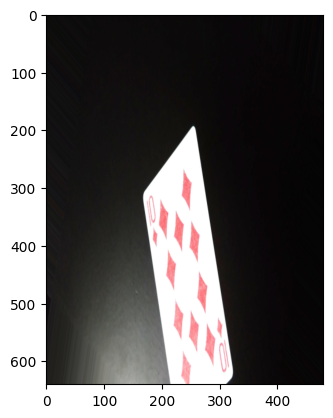

In [7]:
PATH_TO_IMAGES = 'data/Images/Images'
PATH_TO_LABELS = 'data/annotation.json'

data: PlayingCardDataset = PlayingCardDataset(PATH_TO_IMAGES, PATH_TO_LABELS)
image, label = next(iter(data))
plt.imshow(image.permute(1,2,0))
print(cards[int(label.nonzero()+1)])

tensor([51], device='cuda:0')
tensor([[5.9631e-03, 1.6449e-03, 7.0342e-04, 5.0862e-03, 2.2342e-03, 5.8090e-03,
         8.8023e-04, 7.1773e-04, 4.7392e-04, 1.1521e-01, 3.2791e-02, 1.1515e-03,
         1.1343e-02, 3.4141e-03, 6.3726e-02, 3.1444e-04, 9.2847e-04, 3.8781e-03,
         5.9685e-04, 1.8343e-02, 2.9779e-03, 5.5184e-02, 1.0298e-02, 5.2386e-04,
         1.4493e-03, 2.8747e-02, 8.1322e-04, 1.2641e-02, 4.5044e-04, 1.5102e-04,
         2.0121e-03, 7.3611e-02, 3.2708e-02, 1.7935e-03, 4.2192e-02, 1.7738e-02,
         2.4955e-02, 1.7876e-03, 5.7360e-04, 1.0185e-02, 1.9730e-04, 3.2934e-02,
         6.6292e-05, 1.0993e-02, 9.8980e-02, 3.6938e-03, 1.8379e-03, 4.9534e-03,
         1.1232e-02, 4.6226e-03, 2.2543e-04, 2.1939e-01, 1.4871e-02]],
       device='cuda:0', grad_fn=<SoftmaxBackward0>)
tensor(38)
tensor([51], device='cuda:0')
tensor([[6.6167e-03, 2.0064e-03, 9.4285e-04, 5.8751e-03, 2.5084e-03, 6.1158e-03,
         1.0511e-03, 1.0145e-03, 5.8335e-04, 1.0823e-01, 3.5630e-02, 1.3336e-

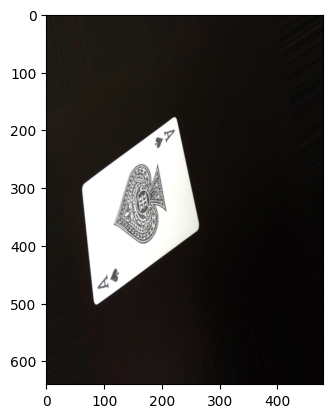

In [8]:
data_iter = iter(data)
for i in range(5):
    image, label = next(data_iter)
    image = image.to("cuda:0")
    plt.imshow(image.permute(1,2,0).to("cpu"))
    output = model(image.unsqueeze(0))
    print(output.argmax(dim=1))
    print(output)
    print(label.argmax(dim=0))